#### Import Related Libraries

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

### read csv in Pandas DataFrame 

In [2]:
fd = pd.read_csv("h1b.csv")

In [3]:
df = pd.read_csv('h1b.txt', delimiter=",", header=None)
df.columns = ['Unnamed: 0', 'CASE_STATUS','EMPLOYER_NAME', 'SOC_NAME' ,'JOB_TITLE' ,'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon', 'lat']
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,NaN,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,1.0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256
2,2.0,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,"PLANO, TEXAS",-96.6988856,33.0198431
3,3.0,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575
4,4.0,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016,"DENVER, COLORADO",-104.990251,39.7392358


In [4]:
df = df.drop(index=0)

In [5]:
#df['PREVAILING_WAGE'] = df['PREVAILING_WAGE'].astype(float).astype(str)+'.0'

In [6]:
print(df.dtypes)

Unnamed: 0            float64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE        object
YEAR                   object
WORKSITE               object
lon                    object
lat                    object
dtype: object


### show columns

In [7]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [8]:
print(df.dtypes)

Unnamed: 0            float64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE        object
YEAR                   object
WORKSITE               object
lon                    object
lat                    object
dtype: object


In [9]:
print(fd.dtypes)

Unnamed: 0              int64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                    int64
WORKSITE               object
lon                   float64
lat                   float64
dtype: object


### delete 'unnamed:0'  column from data set

In [10]:
df = df.drop('Unnamed: 0', axis=1)

In [11]:
df.columns


Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

## check no of rows in data frame

In [12]:
df.shape[0]

3002458

## Drop All rows which has any NA value and show first 5 rows after this operation

In [13]:
df = df.dropna(how='any')

In [14]:
df['PREVAILING_WAGE'] = df['PREVAILING_WAGE'].astype(float)
df['YEAR'] = df['YEAR'].astype(int)
df['lon'] = df['lon'].astype(float)
df['lat'] = df['lat'].astype(float)

In [15]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


## reset index and check how many rows you have 

In [16]:
df.shape[0]

2877765

## Write a code to find out top 15 hiring company (Employer Name) 

In [17]:
df['EMPLOYER_NAME'].value_counts().head()

INFOSYS LIMITED                      130257
TATA CONSULTANCY SERVICES LIMITED     64273
WIPRO LIMITED                         45673
DELOITTE CONSULTING LLP               35999
IBM INDIA PRIVATE LIMITED             33585
Name: EMPLOYER_NAME, dtype: int64

<AxesSubplot:>

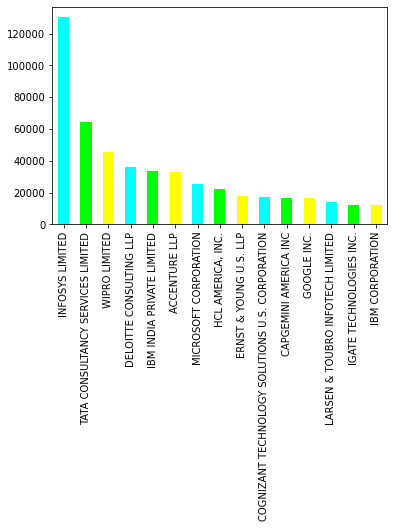

In [18]:
df['EMPLOYER_NAME'].value_counts()[:15].plot(kind='bar', color=['cyan','lime','yellow',]*5 )

### Top 15 companies which provide highest PREVALING WAGE

In [19]:
df['PREVAILING_WAGE'].value_counts().head()

60000.0    10185
55245.0     6745
62566.0     6480
58053.0     5683
52499.0     5492
Name: PREVAILING_WAGE, dtype: int64

##### Average PREVAILING WAGE

In [20]:
df['PREVAILING_WAGE'].mean()

145166.64888402403

In [21]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


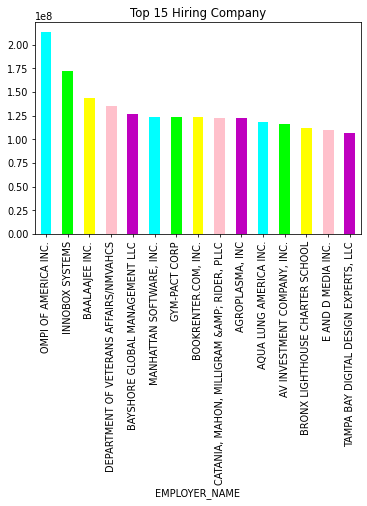

In [22]:
plt.figure(dpi=70)
plt.title(label='Top 15 Hiring Company')
df.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].mean().sort_values(ascending=False).head(15).plot(kind='bar', color=['cyan','lime','yellow','pink','m'])
plt.show()

In [23]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Top 20 WORKSITE 

In [24]:
df['WORKSITE'].value_counts().head(20)

NEW YORK, NEW YORK            190863
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: WORKSITE, dtype: int64

<AxesSubplot:>

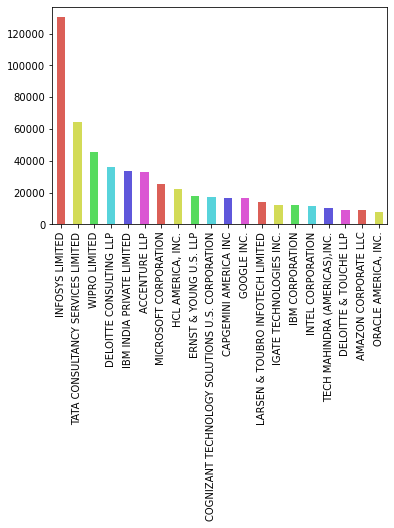

In [25]:
wac = sns.color_palette('hls')
df['EMPLOYER_NAME'].value_counts()[:20].plot(kind='bar', color=wac)

### head of Worksite Column

In [26]:
df['WORKSITE'].head()

1        ANN ARBOR, MICHIGAN
2               PLANO, TEXAS
3    JERSEY CITY, NEW JERSEY
4           DENVER, COLORADO
5        ST. LOUIS, MISSOURI
Name: WORKSITE, dtype: object

### Show Column Names

In [27]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Apply a Function on DataFrame to gather only State Name from Worksite

    eg. worksite name current -  SAN FRANCISCO, CALIFORNIA
        worksite name after - CALIFORNIA
        
**note**: there sholud not be any space at the begning or end of worksite name

In [28]:
df['WORKSITE'] = df['WORKSITE'].apply(lambda x: x.split(',')[-1].strip())

In [29]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,MICHIGAN,-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,TEXAS,-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,NEW JERSEY,-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,COLORADO,-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,MISSOURI,-90.199404,38.627003


**note:** if you view your analysis than you will find that 'MARIANA ISLANDS' worksite name is replaced with NA values

### Replace all NA records in your Worksite Column with Value  'MARIANA ISLANDS' 


In [30]:
df['WORKSITE'] = df['WORKSITE'].fillna('MARIANA ISLANDS')

### Print out how many unique Worksites are there

In [31]:
df['WORKSITE'].nunique()

53

##### show column names 

In [32]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

#### Rename you column names as

    {'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATE','lon':'LON','lat':'LAT'}

In [33]:
co = {'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATE','lon':'LON','lat':'LAT'}
df = df.rename(columns=co)
df.head()

,CASE_STATUS,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATE,LON,LAT
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,MICHIGAN,-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,TEXAS,-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,NEW JERSEY,-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,COLORADO,-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,MISSOURI,-90.199404,38.627003


#### Now Remove all Columns Except these columns 

    'CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"

In [34]:
df = df.loc[:,['CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"]]

In [35]:
df.head()

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
1,CERTIFIED-WITHDRAWN,2016,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,UNIVERSITY OF MICHIGAN,-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,2016,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,"GOODMAN NETWORKS, INC.",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,2016,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,"PORTS AMERICA GROUP, INC.",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,2016,COLORADO,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",-104.990251,39.739236
5,WITHDRAWN,2016,MISSOURI,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,PEABODY INVESTMENTS CORP.,-90.199404,38.627003


__show colnames__

In [36]:
df.columns

Index(['CASE_STATUS', 'YEAR', 'STATE', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

#### Perform These Operations 

    Precise LON and LAT columns upto 2 decimal palaces
    
    Convert YEAR Column into String
    
    Convert PREV_WAGE column into Integer

In [37]:
df['LAT'] = df['LAT'].round(2)
df['LON'] = df['LON'].round(2)
df['YEAR'] = df['YEAR'].astype(str)
df['PREV_WAGE'] = df['PREV_WAGE'].astype(int)
df.head()

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
1,CERTIFIED-WITHDRAWN,2016,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
2,CERTIFIED-WITHDRAWN,2016,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02
3,CERTIFIED-WITHDRAWN,2016,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,"PORTS AMERICA GROUP, INC.",-74.08,40.73
4,CERTIFIED-WITHDRAWN,2016,COLORADO,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",-104.99,39.74
5,WITHDRAWN,2016,MISSOURI,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518,PEABODY INVESTMENTS CORP.,-90.20,38.63


__show top 3 values to check above operations__

In [38]:
df.head(3)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
1,CERTIFIED-WITHDRAWN,2016,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
2,CERTIFIED-WITHDRAWN,2016,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02
3,CERTIFIED-WITHDRAWN,2016,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,"PORTS AMERICA GROUP, INC.",-74.08,40.73


### __show unique values of CASE_STATUS Column__

In [39]:
df['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

# Calculate the petitions distributions by status

In [40]:
v = df['CASE_STATUS'].value_counts()
l = list(v)
print(l)


[2512114, 195721, 85161, 84752, 15, 1, 1]


In [41]:
s = df['CASE_STATUS'].value_counts().head(4)

In [42]:
from matplotlib.pyplot import pie,axis,show
import matplotlib as mpl

#### PETITIONS BY CASE STATUS

In [43]:
p = ['CERTIFIED','CERTIFIED-WITHDRAWN','WITHDRAWN','DENIED']
c = ['cyan','lime','yellow','red']

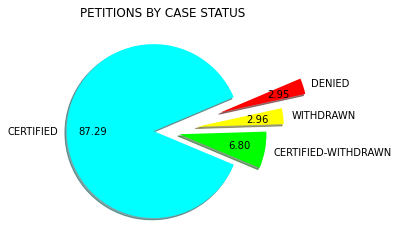

In [44]:
plt.title('PETITIONS BY CASE STATUS')
e = [0.1,0.2,0.4,0.7]
plt.pie(s, center=(0,0), labels=p, colors=c, autopct="%.2f", explode=e, startangle=23, counterclock=True, shadow=True, pctdistance=0.7)
plt.show()

# Calculating the petitions distributions by year

In [45]:
s = df['YEAR'].value_counts()
c = list(s)
print(c)

[629299, 600120, 498027, 422427, 394267, 333625]


In [46]:
df.groupby('YEAR')['CASE_STATUS'].count()

YEAR
2011    333625
2012    394267
2013    422427
2014    498027
2015    600120
2016    629299
Name: CASE_STATUS, dtype: int64

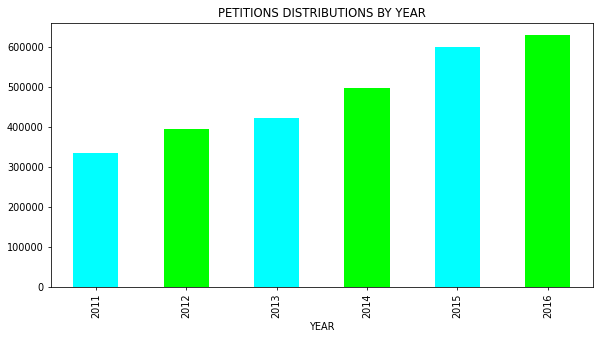

In [47]:
plt.figure(figsize=(10,5), dpi=70)
plt.title('PETITIONS DISTRIBUTIONS BY YEAR')
df.groupby('YEAR')['CASE_STATUS'].count().plot(kind='bar', color=['cyan','lime'])
plt.show()

<AxesSubplot:title={'center':'PETITIONS DISTRIBUTIONS BY YEAR'}, xlabel='YEAR', ylabel='count'>

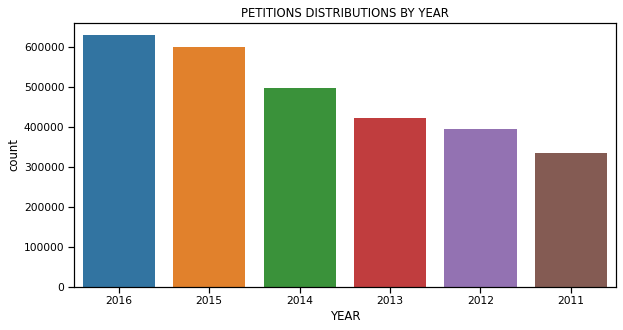

In [48]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(10,5),dpi=70)
plt.title('PETITIONS DISTRIBUTIONS BY YEAR')
sns.countplot(df['YEAR'])

In [49]:
denied = df[df.CASE_STATUS == 'DENIED']
len(denied)

85161

In [50]:
del denied['CASE_STATUS']

In [51]:
denied = denied.reset_index()
denied.head(3)

,index,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,40,2016,WASHINGTON,CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200,"PARALLELS, INC.",-122.22,47.48
1,48,2016,CALIFORNIA,CHIEF EXECUTIVES,PRESIDENT,Y,197683,RANCHO LA PUERTA LLC,-117.16,32.72
2,96,2016,ILLINOIS,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699,BAKER & MCKENZIE PC,-87.63,41.88


In [52]:
#denied_y_count = [0]*6
##for i in range(0,6):
  #  denied_y_count[i] = denied[denied.YEAR == years[i]]['YEAR'].count()
    #denied_y_count
denied['YEAR'].value_counts().tolist()

[25986, 18866, 10976, 10816, 10037, 8480]

<AxesSubplot:title={'center':'DENIED PETITIONS DISTRIBUTIONS BY YEAR'}, xlabel='YEAR', ylabel='count'>

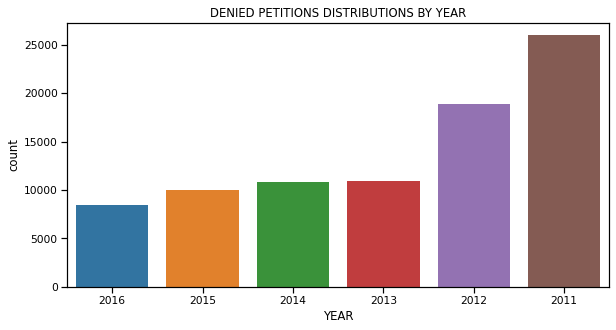

In [53]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(10,5),dpi=70)
plt.title('DENIED PETITIONS DISTRIBUTIONS BY YEAR')
sns.countplot(denied['YEAR'])

<AxesSubplot:title={'center':'petitions distributions by year'}, xlabel='YEAR', ylabel='count'>

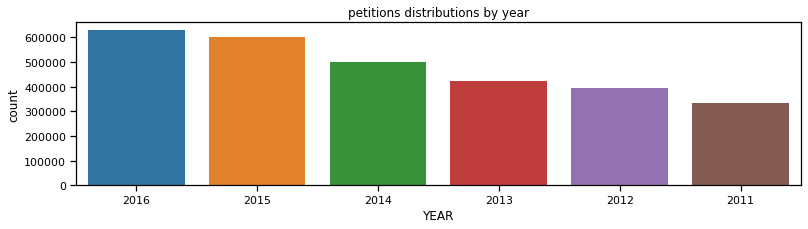

In [54]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,3))
plt.title('petitions distributions by year')
sns.countplot(df['YEAR'])

In [55]:
denied = denied.reset_index()
denied.head(3)

,level_0,index,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,0,40,2016,WASHINGTON,CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200,"PARALLELS, INC.",-122.22,47.48
1,1,48,2016,CALIFORNIA,CHIEF EXECUTIVES,PRESIDENT,Y,197683,RANCHO LA PUERTA LLC,-117.16,32.72
2,2,96,2016,ILLINOIS,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699,BAKER & MCKENZIE PC,-87.63,41.88


In [56]:
denied_year_count = [0]* 6

In [57]:
denied_year_count

[0, 0, 0, 0, 0, 0]

### Denied PETITIONS DISTRIBUTION BY YEAR

<AxesSubplot:title={'center':'DENIED PETITIONS DISTRIBUTIONS BY YEAR'}, xlabel='YEAR', ylabel='count'>

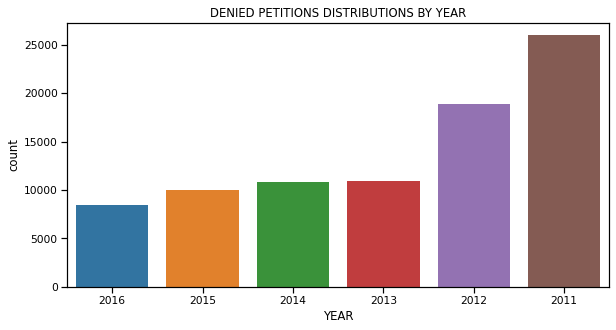

In [58]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(10,5),dpi=70)
plt.title('DENIED PETITIONS DISTRIBUTIONS BY YEAR')
sns.countplot(denied['YEAR'])

### Denied % Rate By Year

In [59]:
p = (denied['YEAR'].value_counts()/df['YEAR'].value_counts())*100
p

2011    7.788985
2012    4.785082
2013    2.598319
2014    2.171770
2015    1.672499
2016    1.347531
Name: YEAR, dtype: float64

<AxesSubplot:title={'center':'DENIED PETITIONS RATE BY YEAR'}, xlabel='YEAR', ylabel='count'>

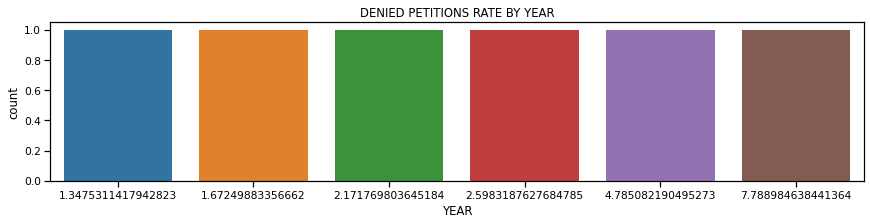

In [60]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(15,3),dpi=70)
plt.title('DENIED PETITIONS RATE BY YEAR')
sns.countplot(p)

In [61]:
df.head()

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
1,CERTIFIED-WITHDRAWN,2016,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
2,CERTIFIED-WITHDRAWN,2016,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02
3,CERTIFIED-WITHDRAWN,2016,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,"PORTS AMERICA GROUP, INC.",-74.08,40.73
4,CERTIFIED-WITHDRAWN,2016,COLORADO,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",-104.99,39.74
5,WITHDRAWN,2016,MISSOURI,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518,PEABODY INVESTMENTS CORP.,-90.20,38.63


## Calculate the number of petitions filed by the States

In [62]:
df.groupby('STATE')['CASE_STATUS'].count()

STATE
ALABAMA                   8644
ALASKA                    1116
ARIZONA                  40184
ARKANSAS                 13775
CALIFORNIA              548539
COLORADO                 30231
CONNECTICUT              48174
DELAWARE                 17705
DISTRICT OF COLUMBIA     22408
FLORIDA                 100384
GEORGIA                  99679
HAWAII                    3157
IDAHO                     3777
ILLINOIS                154843
INDIANA                  28230
IOWA                     15143
KANSAS                   12331
KENTUCKY                 10968
LOUISIANA                10043
MAINE                     3132
MARYLAND                 53145
MASSACHUSETTS           112659
MICHIGAN                 77868
MINNESOTA                45864
MISSISSIPPI               2686
MISSOURI                 32737
MONTANA                    644
NA                        3069
NEBRASKA                  8600
NEVADA                    7004
NEW HAMPSHIRE             9069
NEW JERSEY              206876
NE

In [63]:
df.columns

Index(['CASE_STATUS', 'YEAR', 'STATE', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

**unique stats sorted**

In [64]:
df['STATE'].nunique()

53

In [65]:
 df['STATE'].sort_values(ascending=True).unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [66]:
df.groupby('STATE')['CASE_STATUS'].count()


STATE
ALABAMA                   8644
ALASKA                    1116
ARIZONA                  40184
ARKANSAS                 13775
CALIFORNIA              548539
COLORADO                 30231
CONNECTICUT              48174
DELAWARE                 17705
DISTRICT OF COLUMBIA     22408
FLORIDA                 100384
GEORGIA                  99679
HAWAII                    3157
IDAHO                     3777
ILLINOIS                154843
INDIANA                  28230
IOWA                     15143
KANSAS                   12331
KENTUCKY                 10968
LOUISIANA                10043
MAINE                     3132
MARYLAND                 53145
MASSACHUSETTS           112659
MICHIGAN                 77868
MINNESOTA                45864
MISSISSIPPI               2686
MISSOURI                 32737
MONTANA                    644
NA                        3069
NEBRASKA                  8600
NEVADA                    7004
NEW HAMPSHIRE             9069
NEW JERSEY              206876
NE

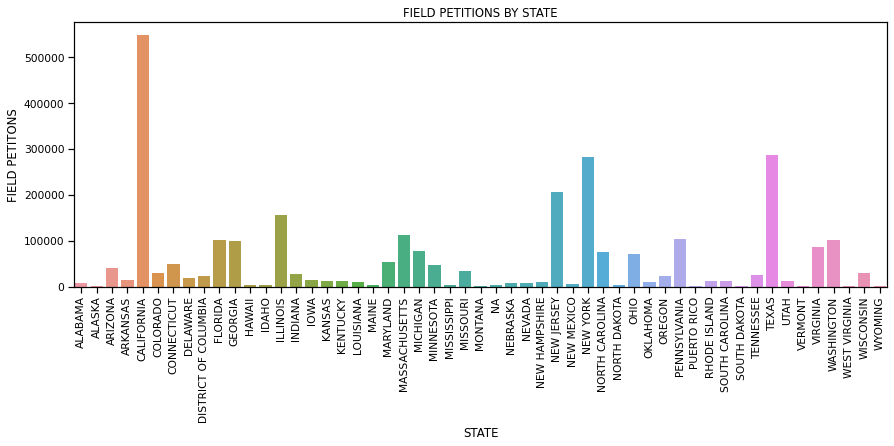

In [67]:
plt.figure(figsize=(15,5),dpi=70)
co = df.groupby('STATE')['CASE_STATUS'].count().index
sns.countplot(data=df, x='STATE', order=co)
plt.xticks(rotation=90)
plt.title('FIELD PETITIONS BY STATE')
plt.ylabel('FIELD PETITONS')
plt.show()

In [68]:
len(df[df['CASE_STATUS'] == 'DENINED'])

0

# Number of petitions denied by the state

__total denied petitions__

In [69]:
denied['YEAR'].value_counts().sum()

85161

## % Rate of Denied Petitions by State 

In [70]:
h1b_df = df[(df['CASE_STATUS'] == 'CERTIFIED') | (df['CASE_STATUS'] == 'DENIED')]
h1b_df['STATE'] = h1b_df['STATE'].replace('NA', 'MARIANA ISLANDS' )
h1b_group = h1b_df.groupby('STATE')
h1b_den = (h1b_group['CASE_STATUS'].apply(lambda x: (x == 'DENIED').sum()) / h1b_group['CASE_STATUS'].count()) * 100
h1b_den

STATE
ALABAMA                  5.068098
ALASKA                  10.736196
ARIZONA                  2.819405
ARKANSAS                 2.070588
CALIFORNIA               3.446933
COLORADO                 3.496372
CONNECTICUT              2.495645
DELAWARE                 2.150673
DISTRICT OF COLUMBIA     5.708340
FLORIDA                  5.481587
GEORGIA                  2.778844
HAWAII                  11.008194
IDAHO                    4.320049
ILLINOIS                 2.562447
INDIANA                  2.853416
IOWA                     2.431431
KANSAS                   3.011832
KENTUCKY                 2.971474
LOUISIANA                5.613165
MAINE                    2.601849
MARIANA ISLANDS         19.993058
MARYLAND                 3.967177
MASSACHUSETTS            3.354909
MICHIGAN                 2.773860
MINNESOTA                2.254151
MISSISSIPPI              6.129303
MISSOURI                 2.295656
MONTANA                  8.517888
NEBRASKA                 3.052935
NEVADA  

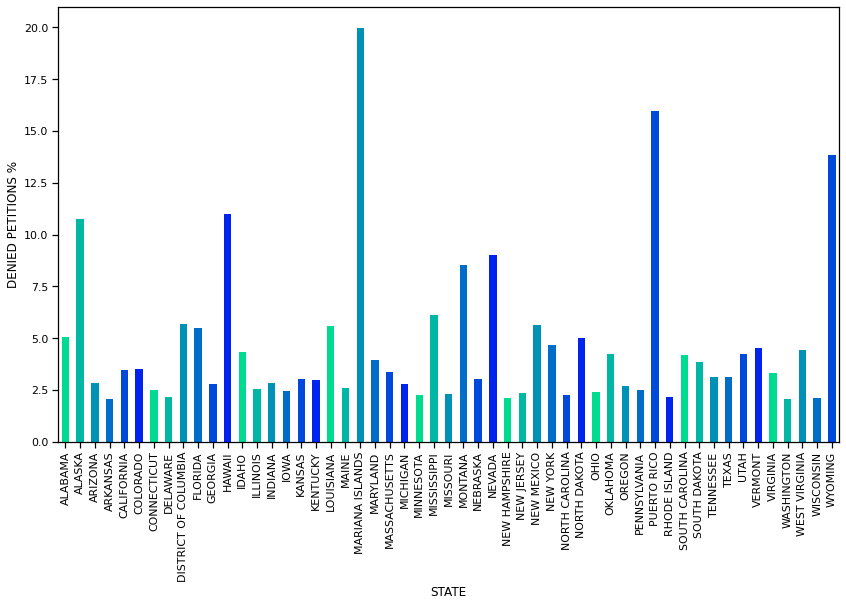

In [71]:
co = sns.color_palette('winter_r')
h1b_den.plot(kind='bar', figsize=(14,8), color=co)
plt.ylabel('DENIED PETITIONS %')
plt.xlabel('STATE')
plt.show()

#### Find out how many applied for Illinois State and how many how them are Denied 

In [72]:
df[df['STATE'] == 'ILLINOIS']['CASE_STATUS'].count()

154843

In [73]:
df[df['STATE'] == 'ILLINOIS'][df['CASE_STATUS'] == 'DENIED']['CASE_STATUS'].count()

3612

#### How Many People are Certified for Job title 'CHIEF PROCESS OFFICER'  who applied for state  Illinois 

In [74]:
df[df['JOB_TITLE'] == 'CHIEF PROCESS OFFICER'][df['STATE'] == 'ILLINOIS']

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
1295152,CERTIFIED,2014,ILLINOIS,Management Analysts,CHIEF PROCESS OFFICER,Y,67080,LITTLER MENDELSON P.C.,-87.63,41.88
1311112,CERTIFIED,2014,ILLINOIS,Management Analysts,CHIEF PROCESS OFFICER,Y,67080,LITTLER MENDELSON P.C.,-87.63,41.88


# Top 25 Job Titles

In [75]:
df['JOB_TITLE'].value_counts().head(25)

PROGRAMMER ANALYST             243357
SOFTWARE ENGINEER              118897
COMPUTER PROGRAMMER             68696
SYSTEMS ANALYST                 60754
SOFTWARE DEVELOPER              41875
BUSINESS ANALYST                38781
COMPUTER SYSTEMS ANALYST        34036
TECHNOLOGY LEAD - US            28307
SENIOR SOFTWARE ENGINEER        26617
TECHNOLOGY ANALYST - US         26010
ASSISTANT PROFESSOR             24436
SENIOR CONSULTANT               24120
CONSULTANT                      22643
PROJECT MANAGER                 19015
DATABASE ADMINISTRATOR          16108
PHYSICAL THERAPIST              14203
RESEARCH ASSOCIATE              13409
COMPUTER PROGRAMMER ANALYST     13116
ACCOUNTANT                      12934
DEVELOPER                       12737
ASSOCIATE                       12447
ANALYST                         11644
LEAD ENGINEER                   11012
SENIOR SOFTWARE DEVELOPER       10031
SYSTEMS ENGINEER - US           10020
Name: JOB_TITLE, dtype: int64

<AxesSubplot:>

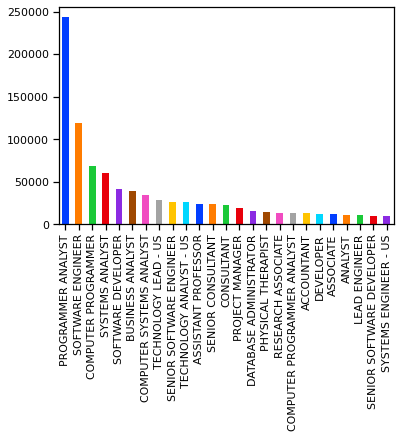

In [76]:
color = sns.color_palette('bright')
df['JOB_TITLE'].value_counts().head(25).plot(kind='bar', color=color)